# Taylor Approximations on an Interval

We choose a function $f(x)$ and an interval $[a,b]$.  
Let $x_0 = (a+b)/2$, and $x_0 = a-1$. We plot:
- the exact function $f(x)$,
- the 2-term Taylor approximation about $x_0$,
- the 3-term Taylor approximation about $x_0$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

### Choose f(x) and the interval [a,b]

In [5]:
x = sp.Symbol('x')

# Choose f(x) here (change as desired)
f = sp.sin(x) + sp.Rational(1, 10)*x**2

# Interval [a, b]
a = -2.0
b =  2.0
x0 = 0.5*(a + b)
x0 = a+1

display(f, a, b, x0)


x**2/10 + sin(x)

-2.0

2.0

-1.0

In [6]:
# Step 1: substitute x = x0 into the symbolic expression
f_at_x0 = f.subs(x, x0)

# Step 2: convert the symbolic result to a numerical value
f0 = sp.N(f_at_x0)

fp  = sp.diff(f, x)
fpp = sp.diff(fp, x)

fp0  = sp.N(fp.subs(x, x0))
fpp0 = sp.N(fpp.subs(x, x0))

# Taylor approximations (symbolic expressions)
T2 = f0 + fp0*(x - x0)
T3 = f0 + fp0*(x - x0) + (fpp0/2)*(x - x0)**2

sp.simplify(T2), sp.simplify(T3)

(0.34030230586814*x - 0.401168678939757,
 0.520735492403948*x**2 + 1.38177329067604*x + 0.119566813464191)

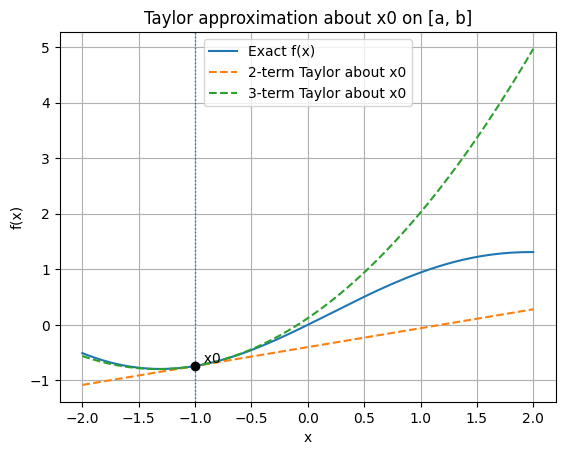

In [7]:
# Convert SymPy expressions to fast numerical functions

# Sample points
xx = np.linspace(a, b, 500)

# Evaluate expressions explicitly
f_num  = np.array([sp.N(f.subs(x, xi))  for xi in xx], dtype=float)
T2_num = np.array([sp.N(T2.subs(x, xi)) for xi in xx], dtype=float)
T3_num = np.array([sp.N(T3.subs(x, xi)) for xi in xx], dtype=float)

# Also evaluate f(x0) explicitly for plotting
f0 = float(sp.N(f.subs(x, x0)))

plt.figure()
plt.plot(xx, f_num, label="Exact f(x)")
plt.plot(xx, T2_num, "--", label="2-term Taylor about x0")
plt.plot(xx, T3_num, "--", label="3-term Taylor about x0")

# Mark x0
plt.axvline(x0, linestyle=":", linewidth=1)
plt.plot(x0, f0, "ko")
plt.text(x0, f0, "  x0", va="bottom")

plt.title("Taylor approximation about x0 on [a, b]")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

### Observation

When the expansion point \(x_0\) is not centered in the interval,
the quadratic (3-term) Taylor approximation captures curvature effects
that the linear (2-term) approximation misses.

Higher-order Taylor terms improve accuracy **near the expansion point**,
but do not guarantee accuracy over the entire interval.